In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [25]:
# Save references to each table
stations = Base.classes.station
measurements = Base.classes.measurement

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
most_recent_date

('2017-08-23',)

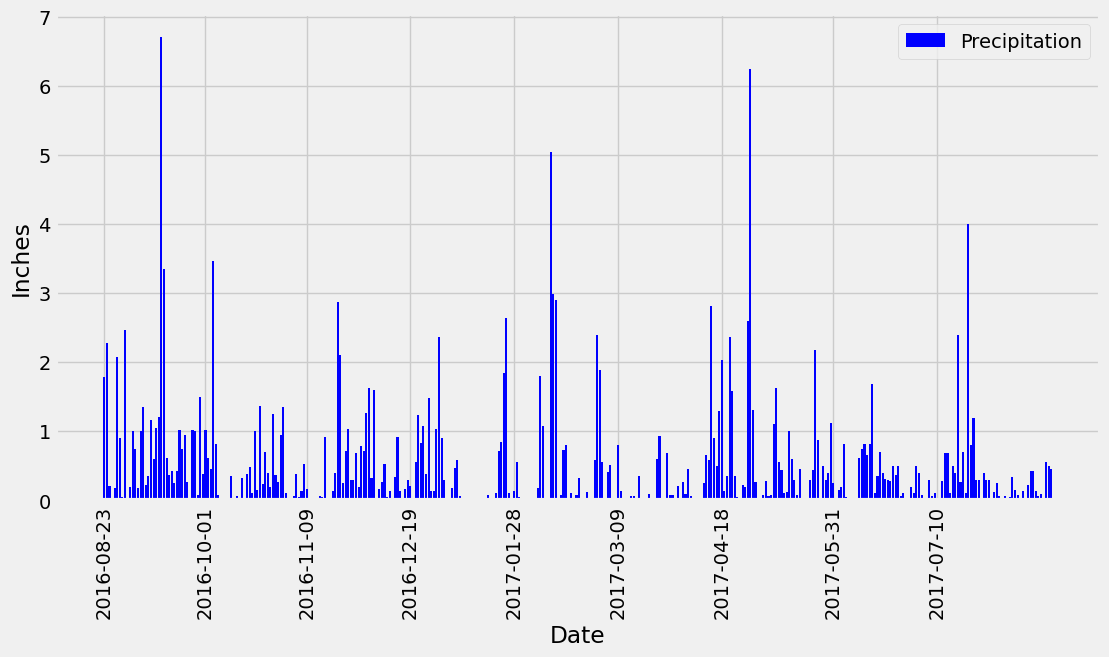

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = datetime.strptime('2017-08-23', '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurements.date, measurements.prcp).\
                    filter(measurements.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# used ChatGpt to determine error in dates, needed to convert dates to datetime format
prcp_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
prcp_df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
prcp_df.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Precipitation'], width=0.8, color='blue')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['Precipitation'])

tick_locations = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', 
                 '2017-05-31', '2017-07-10']
plt.xticks(tick_locations, rotation=90)
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_stats = prcp_df['Precipitation'].describe()
prcp_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(measurements.station).distinct().count()
station_count

9

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# used Xpert Learning Assistant to fix error in code - '.label('station_count')
most_active_count = session.query(measurements.station, func.count(measurements.station).label('station_count')).\
                                group_by(measurements.station).\
                                order_by(func.count(measurements.station).desc()).all()
most_active_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = [measurements.station,
         func.min(measurements.tobs),
         func.max(measurements.tobs),
         func.avg(measurements.tobs)]
most_active_temps = session.query(*temps).\
        filter(measurements.station == 'USC00519281').\
        group_by(measurements.station).\
        order_by(measurements.station).all()
most_active_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

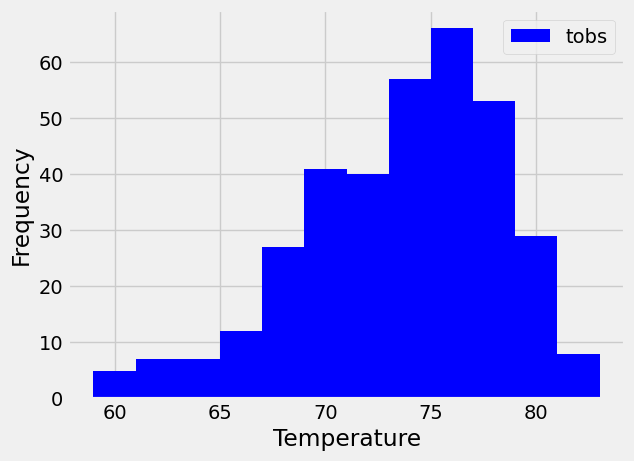

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp_data = session.query(measurements.tobs).\
                    filter(measurements.station == 'USC00519281').\
                    filter(measurements.date >= one_year_ago).all()

most_active_temp_df = pd.DataFrame(most_active_temp_data, columns=['Temperature'])
most_active_temp_df.to_csv('output.csv', index=False)

plt.hist(most_active_temp_df['Temperature'], bins=12, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show

# Close Session

In [33]:
# Close Session
session.close()